HOUSING PRICE PREDICTION ML MODEL

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv("C:/Users/ASUS/OneDrive - Manipal Education (MENA) FZ LLC/Desktop/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [56]:
data.dropna(inplace=True)

In [57]:
from sklearn.model_selection import train_test_split

X= data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

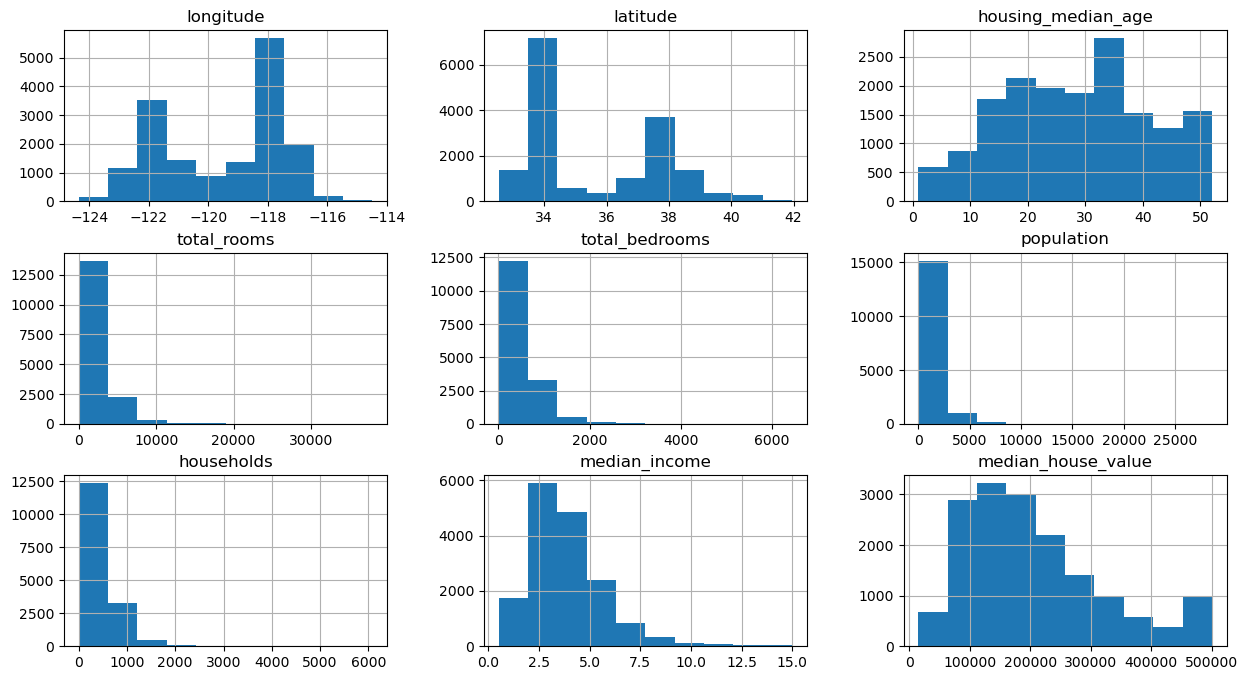

In [58]:
train_data = X_train.join(y_train)
train_data
train_data.hist(figsize=(15,8))

<Axes: >

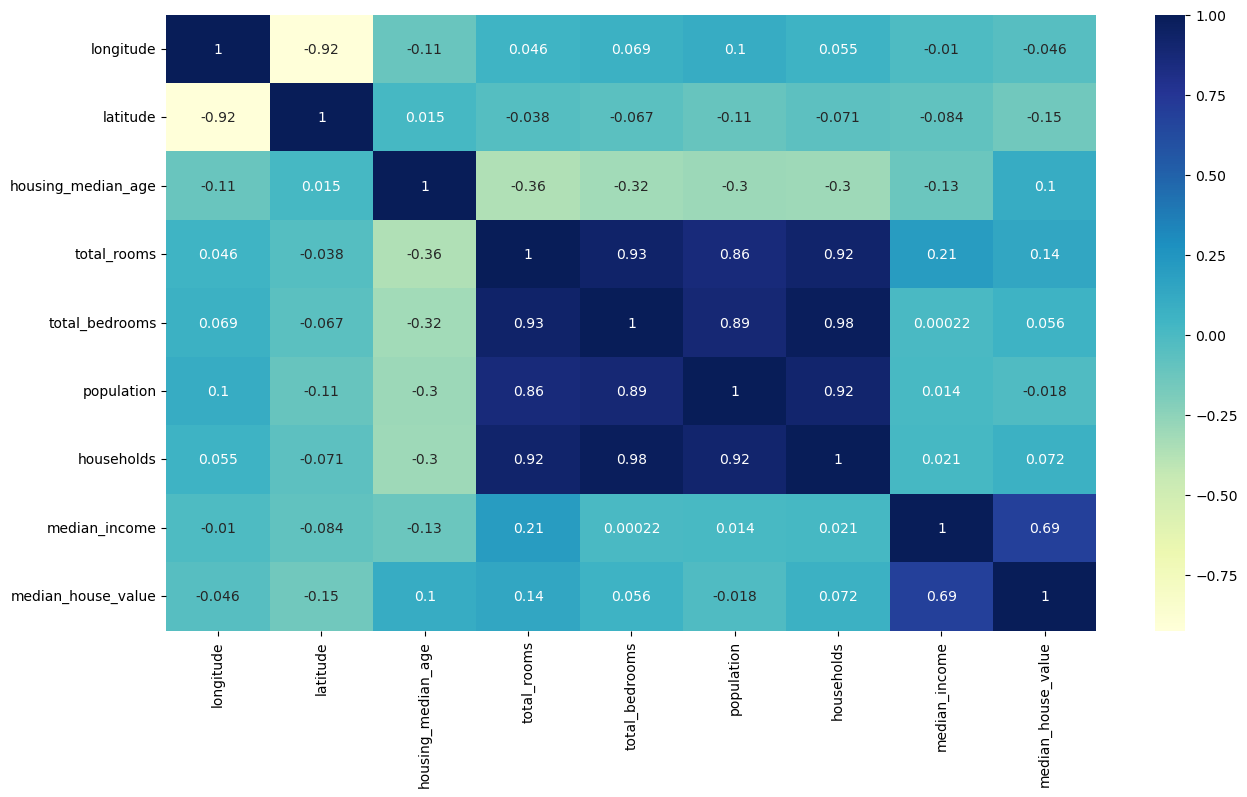

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

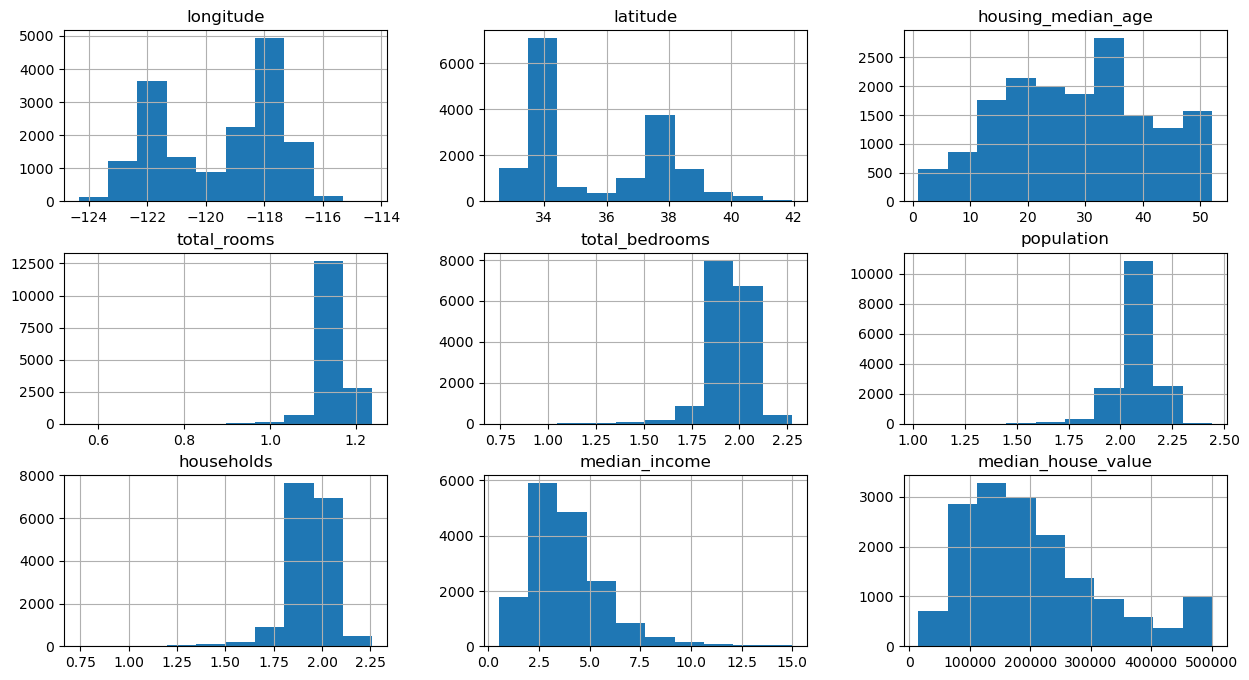

In [49]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

train_data.hist(figsize=(15,8))

In [70]:
train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [71]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19171,-122.66,38.44,17.0,5815.0,898.0,2614.0,887.0,4.3657,215900.0,1,0,0,0,0
5842,-118.31,34.19,42.0,724.0,149.0,420.0,150.0,3.0625,361700.0,1,0,0,0,0
161,-122.25,37.80,52.0,2087.0,510.0,1197.0,488.0,3.0149,218400.0,0,0,0,1,0
19572,-120.94,37.58,19.0,1549.0,369.0,770.0,370.0,2.0493,99500.0,0,1,0,0,0
15940,-122.41,37.72,35.0,2104.0,434.0,1225.0,410.0,4.8214,242900.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,-118.27,34.13,47.0,1375.0,359.0,1512.0,418.0,2.1071,208900.0,1,0,0,0,0
2052,-119.73,36.72,15.0,2246.0,456.0,1190.0,403.0,2.0294,70400.0,0,1,0,0,0
815,-122.04,37.61,36.0,1151.0,216.0,727.0,215.0,4.1719,187000.0,0,0,0,1,0
8936,-118.47,34.02,41.0,2136.0,549.0,986.0,557.0,2.7254,444400.0,1,0,0,0,0
